<center><h1> GOLDEN TASK BREAST CANCER PREDICTION </h1> </center>

# Importing Libraries


In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Ignoring Warnings

In [18]:
import warnings
warnings.filterwarnings("ignore")


In [21]:
data_BCD = pd.read_csv('Breast_cancer_data.csv')
print(data_BCD.sample(10))

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
177,16.460,20.11,109.30,832.9,0.09831,0
563,20.920,25.09,143.00,1347.0,0.10990,0
97,9.787,19.94,62.11,294.5,0.10240,1
386,12.210,14.09,78.78,462.0,0.08108,1
266,10.600,18.95,69.28,346.4,0.09688,1
301,12.460,19.89,80.43,471.3,0.08451,1
298,14.260,18.17,91.22,633.1,0.06576,1
550,10.860,21.48,68.51,360.5,0.07431,1
457,13.210,25.25,84.10,537.9,0.08791,1
557,9.423,27.88,59.26,271.3,0.08123,1


In [22]:
print(data_BCD.head(10))

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0 

In [23]:
# summary of dataset
data_BCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


- We can see that there are 6 columns in the dataset and there are no missing values.

In [24]:
# check the distribution of the target variable
data_BCD['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

- The target variable is `diagnosis`. It contains 2 values - 0 and 1. 

- `0` is for **Negative prediction** and `1` for **Positive prediction**.

- We  can see that the problem is binary classification task.

In [26]:
X = data_BCD[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = data_BCD['diagnosis']

# split the dataset into the training set and test set


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Model Development and Training

In [28]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier()

# Model Prediction

In [9]:
# predict the results
y_pred=clf.predict(X_test)


In [29]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


- Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

In [30]:
y_pred_train = clf.predict(X_train)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9298


- The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

# Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55

True Negatives(TN) =  104

False Positives(FP) =  8

False Negatives(FN) =  4


<Axes: >

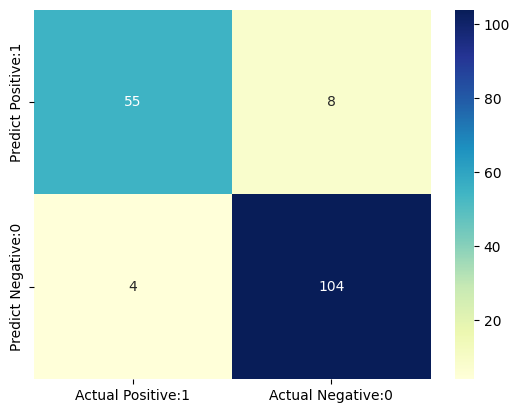

In [35]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

